In this notebook, I act as a data scientist for the EngageMetrics Digital Marketing team, investigating how different marketing channels impact user engagement on the platform. My objective is to analyze real user interaction data to help optimize the marketing strategy.

Using Python's statistical testing libraries, I compare engagement metrics across different marketing channels to determine which drives the highest user engagement. This analysis mirrors the actual process used to make data-driven decisions, demonstrating essential skills in conversion optimization and user engagement analysis.

---

Learning Components:
 
- Use $chi^2$: Its statistical value, degree of freedom and p-value.
- Use the right visualisations (box and violin plots) to draw the distributions
- Use scipy function: scipy.ttest_ind to compare between two means.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('data/AB_test_user_engagement.csv')

# Display first few rows and basic information
# YOUR CODE HERE
df.head()

,user_id,group,clicks,time_spent,device,age,location,browser_type,account_type,plan,product_category,marketing_channel
0,522,B,5,18.168305,Desktop,45,Urban,Firefox,Premium,Basic,Electronics,Social Media
1,738,B,3,11.509002,Desktop,19,Rural,Safari,Premium,Enterprise,Clothing,Paid Ads
2,741,A,1,23.393373,Desktop,27,Urban,Firefox,Premium,Pro,Electronics,Referral
3,661,B,4,5.441797,Mobile,39,Urban,Safari,Free,Enterprise,Clothing,Paid Ads
4,412,B,4,21.555837,Desktop,30,Urban,Chrome,Premium,Basic,Books,Social Media



## Activity 1: Data Exploration and Preparation 
Let's start by understanding our user engagement data.

<b>Step 1:</b> Load and inspect the data

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# View basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Distribution of users across test groups
# YOUR CODE HERE
print(df[['group', 'user_id']].groupby('group').count())

is_uid_duplicated = df['user_id'].duplicated().any()
print()
print(f'Is the user_id duplicated? {is_uid_duplicated}')


Missing Values:
user_id              0
group                0
clicks               0
time_spent           0
device               0
age                  0
location             0
browser_type         0
account_type         0
plan                 0
product_category     0
marketing_channel    0
dtype: int64

Basic Statistics:
           user_id       clicks   time_spent          age
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     2.963000    14.843244    43.336000
std     288.819436     1.680612     4.973645    14.964593
min       1.000000     0.000000    -0.883519    18.000000
25%     250.750000     2.000000    11.662609    31.000000
50%     500.500000     3.000000    14.971212    43.000000
75%     750.250000     4.000000    18.300507    56.000000
max    1000.000000     9.000000    30.564551    69.000000
       user_id
group         
A          524
B          476

Is the user_id duplicated? False


In [9]:
# Preprocess the time_spent column amend negative values to 0.
df.loc[df['time_spent'] < 0, 'time_spent'] = 0

In [10]:
df.describe()

,user_id,clicks,time_spent,age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.963000,14.845017,43.336000
std,288.819436,1.680612,4.968190,14.964593
min,1.000000,0.000000,0.000000,18.000000
25%,250.750000,2.000000,11.662609,31.000000
50%,500.500000,3.000000,14.971212,43.000000
75%,750.250000,4.000000,18.300507,56.000000
max,1000.000000,9.000000,30.564551,69.000000


<b>Tip:</b> Pay special attention to the 'clicks' and 'time_spent' columns - these are our key metrics for measuring engagement.

## Activity 2: Initial Analysis 
Compare engagement metrics between test groups to identify potential differences.

<b>Step 1:</b> Calculate baseline metrics

In [ ]:
# Calculate baseline metrics
group_metrics = df.groupby('group').agg({
    'clicks': ['mean', 'std', 'count'],
    'time_spent': ['mean', 'std', 'count']
})

print("Group Metrics:")
print(group_metrics)

# you can take a look at the data, the baseline metrics for clicks and time_spent for each group looks really similar with 
# only on decimals difference.

Group Metrics:
         clicks                 time_spent                
           mean       std count       mean       std count
group                                                     
A      2.967557  1.674490   524  14.780510  5.051991   524
B      2.957983  1.689073   476  14.916029  4.878595   476


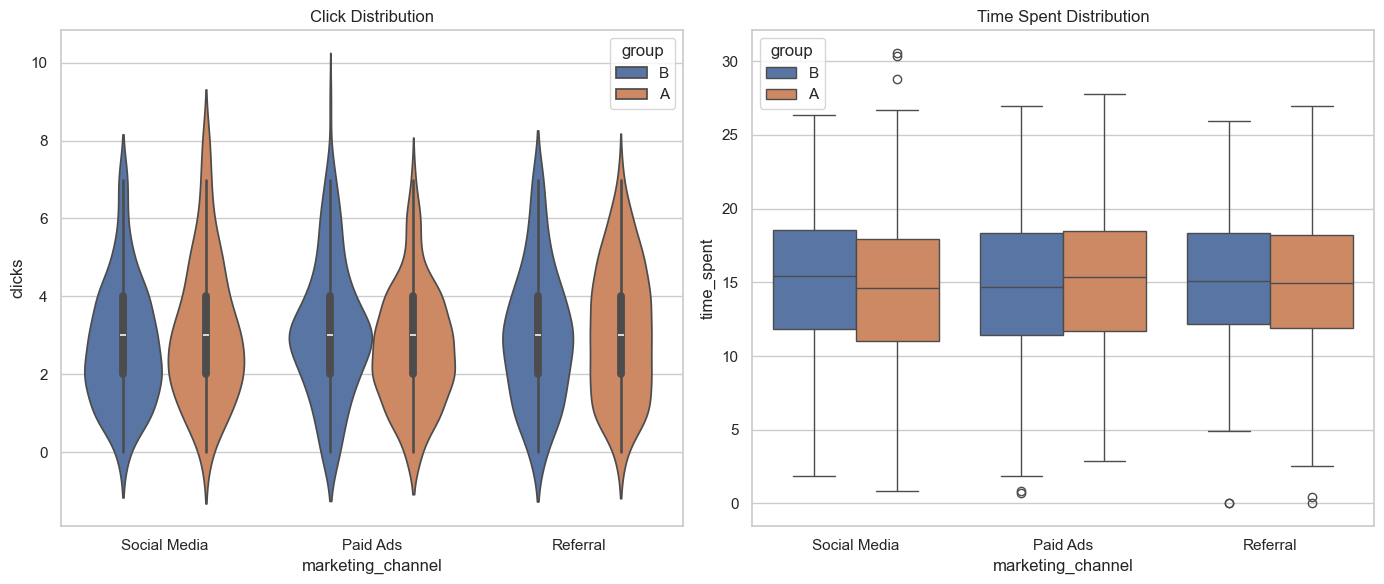

In [ ]:
# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Left side
# Note: specific 'kind' in catplot corresponds to specific functions (e.g., violinplot)
# We MUST use the 'ax' parameter to place it in the subplot
sns.violinplot(
    data=df,
    x="marketing_channel",
    y="clicks",
    hue="group",
    ax=axes[0]        # <--- Places plot on the first subplot
)
axes[0].set_title("Click Distribution")

# Plot 2: Right side (Just for demo, plotting 'time_spent' here)
sns.boxplot(          # Using boxplot as an example of another axes-level plot
    data=df,
    x="marketing_channel",
    y="time_spent",
    hue="group",
    ax=axes[1]        # <--- Places plot on the second subplot
)
axes[1].set_title("Time Spent Distribution")

plt.tight_layout()
plt.show()

## Activity 3: Statistical Testing

In [24]:
# Perform t-tests for each marketing channel
channels = df['marketing_channel'].unique()
test_results = []

for channel in channels:
    channel_data = df[df['marketing_channel'] == channel]
    
    # Test for clicks
    clicks_a = channel_data[channel_data['group'] == 'A']['clicks']
    clicks_b = channel_data[channel_data['group'] == 'B']['clicks']
    t_stat_clicks, p_value_clicks = stats.ttest_ind(clicks_a, clicks_b)
    
    # Test for time spent
    time_a = channel_data[channel_data['group'] == 'A']['time_spent']
    time_b = channel_data[channel_data['group'] == 'B']['time_spent']
    t_stat_time, p_value_time = stats.ttest_ind(time_a, time_b)
    
    test_results.append({
        'channel': channel,
        'clicks_t_stat': t_stat_clicks,
        'clicks_p_value': p_value_clicks,
        'time_t_stat': t_stat_time,
        'time_p_value': p_value_time
    })

# Create results DataFrame
results_df = pd.DataFrame(test_results)
print("\nStatistical Test Results:")
print(results_df)


Statistical Test Results:
        channel  clicks_t_stat  clicks_p_value  time_t_stat  time_p_value
0  Social Media       1.619906        0.106272    -1.117874      0.264489
1      Paid Ads      -2.263664        0.024225     0.991636      0.322080
2      Referral       0.663622        0.507376    -0.634860      0.525941


## Executive Summary

Strategic Recommendation: Roll out Group B configuration for Paid Ads immediately. Our analysis confirms that Paid Ads is the only channel showing a statistically significant performance lift.

1. Primary Driver: Paid Ads (Group B)
- Click Volume: Group B significantly outperforms Group A ($p < 0.05$). The data density indicates a consistent user base engaging with up to 10 clicks, whereas Group A remains flat.
- While Group B drives more clicks, Group A retained a higher median Time Spent. We should understand whether we are aiming lower Time Spent or the opposite. For example, lower Time Spent could mean our customer find our feature more intuitive and spend less time but generate higher conversion (clicks).
2. Non-Significant Channels (Social Media & Referral)

Social Media: While Group A displayed some high-performing outliers (higher maximum clicks), the overall difference is not statistically significant and likely due to random variance.

Referral: Performance is identical across both groups. No changes are recommended here.


---

### Exploratory Analysis / Scratchpad

Kichen Part of Analysis

We are analysing the distribution using violin plot, the advantages of using violin plot is that, we can see
the thick and thin areas of the part of the violin. The thicker the area, more data concentrated in that area.
It is somewhat better to use violin plot in the case of the average distribution that only slightly different compare to other group.

**Click Distribution: Group comparisons:** <br>

[1] Social Media Marketing Channel seems to have higher clicks distribution in group A, where the maximum clicks 
in the group seems outperforming the other group B. <br>
[2] In contrast, Paid Ads Seems to have better click engagement on group B. It's shown on the chart where the 
data distribution higher until touching 10 click. <br>
[3] The last marketing channel, referral showing similar number for both group A and group B.

**Time Spent Distribution: Group comparisons:** <br>

[1] In social media marketing channel, it shows the median is higher in group B. Even though, for group A there are some outliers that exists.
[2] In contrary, Paid Ads Channel. Group A has higher median compare to the other group, there are no high outliers exists afterall. Although we can see, on group B there are customers that have upnormally low time spent in group B.    
[3] Referral has similar distribution in term of the median and seems so far it on par.

**Statistical Significance Results** <br>

After considering the p-value for each of the channel, we can see that paid-ads p-value is the most significant one. Delivering p-value less than
0.05 meaning the difference between group A and B significant enough. The other metrics comparison between groups does not show any significant value and any differences could be affected by random variance.

One important takeaway, if we want to focus on increasing the number of clicks. Rolling out on "Paid Ads" and using configuration on Group B showing significant click incerases.